In [1]:
import tensorflow as tf
import numpy as np

In [58]:
class SOM:
    def __init__(self, width, height, dim):
        self.num_iters = 200
        self.width = width
        self.height = height
        self.dim = dim
        self.node_locs = self.get_locs()
        
        nodes = tf.Variable(tf.random_normal([width*height, dim]))
        self.nodes = nodes
        
        x = tf.placeholder(tf.float32, [dim])
        iter = tf.placeholder(tf.float32)
        
        self.x = x
        self.iter = iter
        
        bmu_loc = self.get_bmu_loc(x)
        
        self.propagate_nodes = self.get_propagation(bmu_loc, x, iter)

In [59]:
    def get_propagation(self, bmu_loc, x, iter):
        num_nodes = self.width * self.height
        rate = 1.0 - tf.div(iter, self.num_iters)
        alpha = rate * 0.5
        sigma = rate * tf.to_float(tf.maximum(self.width, self.height)) / 2.
        expanded_bmu_loc = tf.expand_dims(tf.to_float(bmu_loc), 0)
        sqr_dists_from_bmu = tf.reduce_sum(
            tf.square(tf.subtract(expanded_bmu_loc, self.node_locs)), 1)
        neigh_factor = tf.stack([tf.tile(tf.slice(rate, [i], [1]), [self.dim]) for i in range(num_nodes)])
        nodes_diff = tf.multiply(
            rate_factor,
            tf.subtract(tf.stack([x for i in range(num_nodes)]), self.nodes))
        update_nodes = tf.add(self.nodes, nodes_diff)
        return tf.assign(self.nodes, update_nodes)

In [60]:
    def get_bmu_loc(self, x):
        expanded_x = tf.expand_dims(x, 0)
        sqr_diff = tf.square(tf.subtract(expanded_x, self.nodes))
        dists = tf.reduce_sum(sqr_diff, 1)
        bmu_idx = tf.argmin(dists, 0)
        bmu_loc = tf.stack([tf.mod(bmu_idx, self.width), tf.div(bmu_idx, self.width)])
        return bmu_loc

In [61]:
    def get_locs(self):
        locs = [[x, y]
               for y in range(self.height)
               for x in range(self.width)]
        return tf.to_float(locs)

In [62]:
    def train(self, data):
        with tf.Session() as sess:
            sess.run(tf.global_variables_initalizer())
            for i in range(self.num_iters):
                for data_x in data:
                    sess.run(self.propagate_nodes, feed_dict={self.x: data_x, self.iter: i})
            centroid_grid = [[] for i in range(self.width)]
            self.nodes_val = list(sess.run(self.nodes))
            self.locs_val = list(sess.run(self.nodes_locs))
            for i, l in enumerate(self.locs_val):
                centroid_grid[int(1[0])].append(self.nodes_val[i])
            self.centroid_grid = centroid_grid

 Training...
 random_initialization took: 0.000000 seconds
 Rough training...
 radius_ini: 2.000000 , radius_final: 1.000000, trainlen: 40

 epoch: 1 ---> elapsed time:  0.107000, quantization error: 0.872350

 epoch: 2 ---> elapsed time:  0.106000, quantization error: 1.347228

 epoch: 3 ---> elapsed time:  0.106000, quantization error: 1.188281

 epoch: 4 ---> elapsed time:  0.104000, quantization error: 1.165931

 epoch: 5 ---> elapsed time:  0.105000, quantization error: 1.155589

 epoch: 6 ---> elapsed time:  0.104000, quantization error: 1.149338

 epoch: 7 ---> elapsed time:  0.105000, quantization error: 1.143093

 epoch: 8 ---> elapsed time:  0.106000, quantization error: 1.136857

 epoch: 9 ---> elapsed time:  0.104000, quantization error: 1.130637

 epoch: 10 ---> elapsed time:  0.104000, quantization error: 1.124441

 epoch: 11 ---> elapsed time:  0.103000, quantization error: 1.118276

 epoch: 12 ---> elapsed time:  0.103000, quantization error: 1.112151

 epoch: 13 ---> e

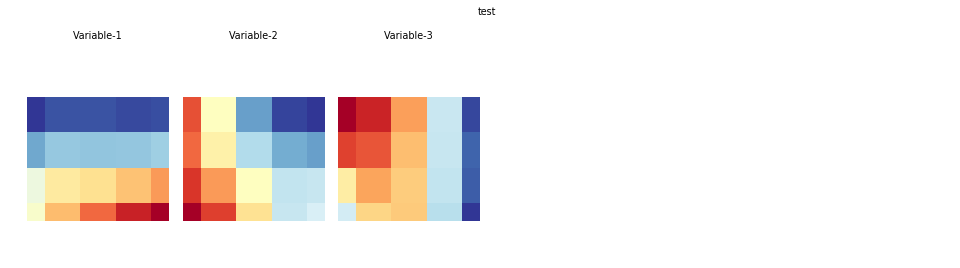

In [67]:
from matplotlib import pyplot as plt
import numpy as np
from sompy.visualization.mapview import View2D
import sompy

colors = np.array(
         [[0., 0., 0.],
          [0., 0., 1.],
          [0., 0., 0.5],
          [0.125, 0.529, 1.0],
          [0.33, 0.4, 0.67],
          [0.6, 0.5, 1.0],
          [0., 1., 0.],
          [1., 0., 0.],
          [0., 1., 1.],
          [1., 0., 1.],
          [1., 1., 0.],
          [1., 1., 1.],
          [.33, .33, .33],
          [.5, .5, .5],
          [.66, .66, .66]])



mapsize = [4, 4]

som = SOMFactory().build(colors, normalization = 'var', initialization='random')

som.train(n_job=1, verbose='info')

v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
v.show(som, what='codebook', which_dim="all", cmap=None, col_sz=6)